[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_05/blob/master/F05_SC--DJ--Statistics_Sprint_Challenge.ipynb)

## **Probability and Statistics**


The journey into Statistics this week can be distilled into the following objectives:

a) Conduct Quantitative Data Analysis

b) Perform Graphical Data Analysis

c) Use Statistical Techniques to make quantitative statements on data (encompassing discrete and continuous variables)



In this Sprint Challenge, we are going to use the "Loans" data set. The data set contains information about applicants who have applied for home loans, their monthly incomes, the loan amount (in 000's) the property type they are seeking, Credit History (0 indicates no credit history) and their associated loan status.



The dataset can be retrieved from here: https://www.dropbox.com/s/nmo9vweoscsg328/Loan_Dataset.csv?raw=1

Create solutions for the following code blocks. This exercise should take ~ 3 hours.

Share with mlsubmissions@lambdaschool.com when finished.


In [25]:
#!time wget -c https://www.dropbox.com/s/nmo9vweoscsg328/Loan_Dataset.csv?raw=1 && date
!ls -lh Loan_Dataset.csv?raw=1 && mv Loan_Dataset.csv?raw=1 Loan_dataset.csv

ls: Loan_Dataset.csv?raw=1: No such file or directory


In [26]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [27]:
### This didn't work in the notebook but maybe I should have waited longer.
### I had to confirm the installation when I ran it in the bash shell so I probably should run it there
#!conda install -c conda-forge missingno 

In [28]:
import missingno as msno

In [29]:
df = pd.read_csv('Loan_Dataset.csv')
df.shape

(614, 13)

**Step 1:** Examine the data set for any missing values

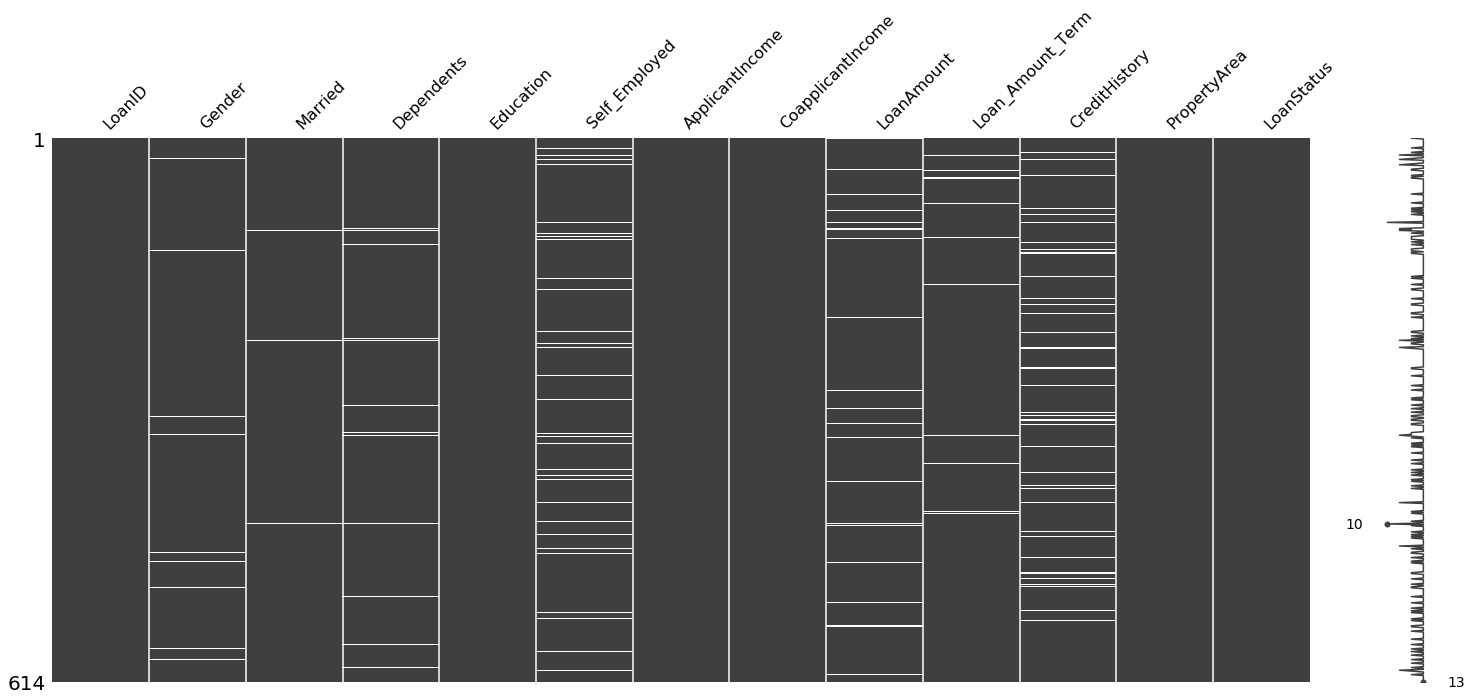

In [31]:
msno.matrix(df);

In [32]:
df.isna().sum()

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

**Step 2:** If there are any missing values, treat the misisng values. Here is a article that provides insight into the common methods to deal with missing values:

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

Please use the tips provided in the article to deal with missing values

In [53]:
print(df['Gender'].value_counts())
df['Gender'].fillna(df['Gender'].value_counts().index[0], inplace=True)

print(df['Gender'].isna().sum())


Male      502
Female    112
Name: Gender, dtype: int64
0


In [56]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [57]:
# Replace NaN with the most common amount
print(df['Married'].value_counts())
df['Married'].fillna(df['Married'].value_counts().index[0], inplace=True)

print(df['Married'].isna().sum())


Yes    398
No     213
Name: Married, dtype: int64
0


In [64]:
# Replace NaN with the most common amount
df['Dependents'].fillna(df['Dependents'].value_counts().index[0], inplace=True)
df['Dependents'].isna().sum()


0

In [68]:
# Replace NaN with the most common amount
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0], inplace=True)
df['Self_Employed'].isna().sum()

0

In [78]:
# Replace NaN with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['LoanAmount'].isna().sum()

0

In [80]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [84]:
# Replace NaN with the median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().index[0], inplace=True)
df['Loan_Amount_Term'].isna().sum()

0

In [92]:
# Replace NaN with the median
df['CreditHistory'].fillna(df['CreditHistory'].value_counts().index[0], inplace=True)
df['CreditHistory'].isna().sum()

0

In [93]:
print(df.isna().sum())

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64


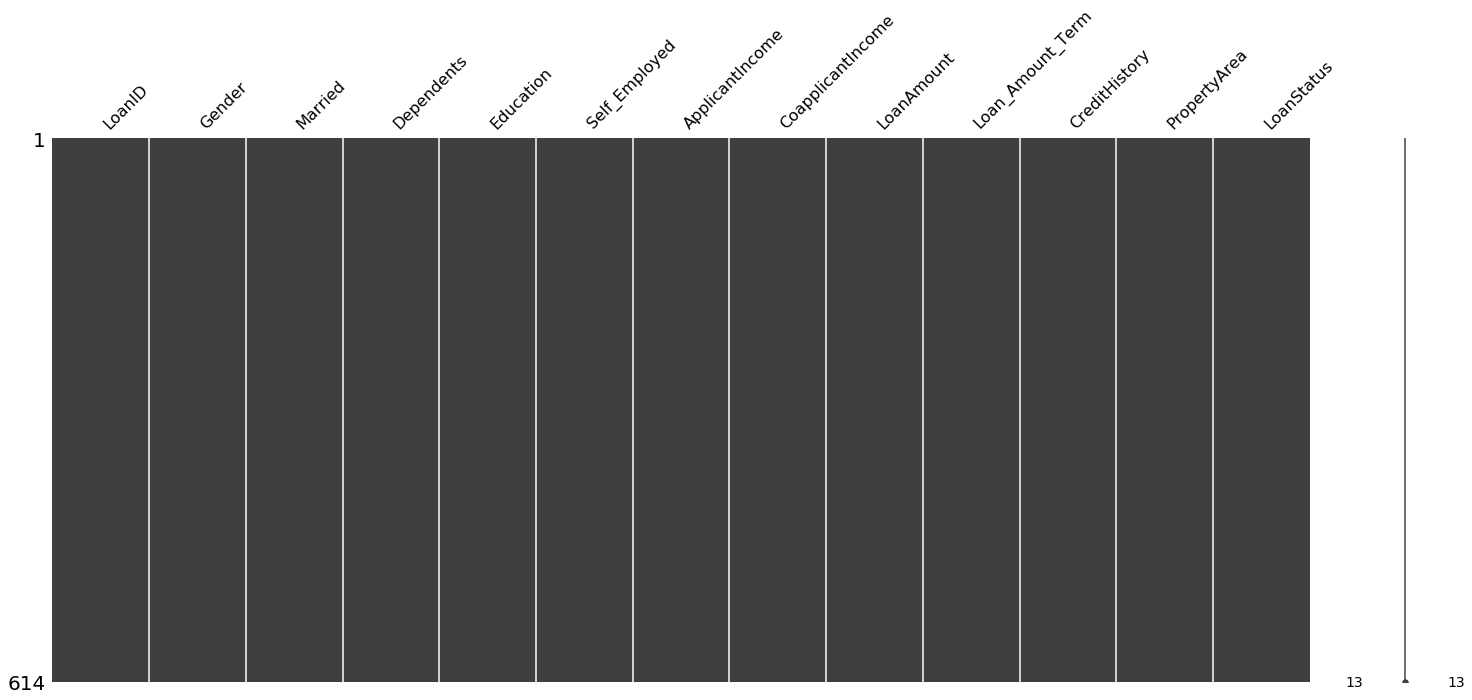

In [94]:
msno.matrix(df);

**Step 3:**  Conduct Quantitative Data Analysis - Compute summary statistics i.e. Mean, Median, Standard Deviation, Variance for:

1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

In [97]:
df.head()

,LoanID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [107]:
def summary_stats(category):
    summary = []
    print(category,'     MEAN',df[category].mean())
    summary.append(df[category].mean())
    print(category,'   MEDIAN',df[category].median())
    summary.append(df[category].median())
    print(category,'  STD DEV',df[category].std())
    summary.append(df[category].std())
    print(category,' VARIANCE',df[category].var())
    summary.append(df[category].var())
    print(category,'CHK VAR  ',df[category].std()**2)
    print(summary,'\n')
    
    return summary

summary_stats('ApplicantIncome')



ApplicantIncome      MEAN 5403.459283387622
ApplicantIncome    MEDIAN 3812.5
ApplicantIncome   STD DEV 6109.041673387174
ApplicantIncome  VARIANCE 37320390.167181164
ApplicantIncome CHK VAR   37320390.167181164
[5403.459283387622, 3812.5, 6109.041673387174, 37320390.167181164] 



[5403.459283387622, 3812.5, 6109.041673387174, 37320390.167181164]

In [130]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
Loan_Categories = ['ApplicantIncome','TotalIncome','LoanAmount','Loan_Amount_Term']
for category in Loan_Categories:
    summary_stats(category)     

ApplicantIncome      MEAN 5403.459283387622
ApplicantIncome    MEDIAN 3812.5
ApplicantIncome   STD DEV 6109.041673387174
ApplicantIncome  VARIANCE 37320390.167181164
ApplicantIncome CHK VAR   37320390.167181164
[5403.459283387622, 3812.5, 6109.041673387174, 37320390.167181164] 

TotalIncome      MEAN 7024.705081414722
TotalIncome    MEDIAN 5416.5
TotalIncome   STD DEV 6458.66387219434
TotalIncome  VARIANCE 41714339.01398839
TotalIncome CHK VAR   41714339.01398838
[7024.705081414722, 5416.5, 6458.66387219434, 41714339.01398839] 

LoanAmount      MEAN 145.75244299674267
LoanAmount    MEDIAN 128.0
LoanAmount   STD DEV 84.10723338042615
LoanAmount  VARIANCE 7074.026706909471
LoanAmount CHK VAR   7074.026706909471
[145.75244299674267, 128.0, 84.10723338042615, 7074.026706909471] 

Loan_Amount_Term      MEAN 342.4104234527687
Loan_Amount_Term    MEDIAN 360.0
Loan_Amount_Term   STD DEV 64.42862906767301
Loan_Amount_Term  VARIANCE 4151.048243539801
Loan_Amount_Term CHK VAR   4151.0482435398
[3

**Step 4:** Perform Graphical Data Analysis:

a) Contruct an ECDF to analyze the distribution of 1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

b) Overlay each of the ECDF plots with markers (i.e. Diamonds) depicting the corresponding 25th, 50th and 75th percentiles respectively

c) Build Histograms to examine the distribution of 1) Applicant Income, 2) Total Income = Applicant Income + Coapplicant Income 3) Loan Amount, 4) Loan Term

d) Create BoxPlots to understand the distribution of 1) Application Income By Gender of Applicant, 2) Application Income By Education of Applicant, 3) Application Income by Employment Type, 4) Loan Amount by Gender of Applicant, 5) Loan Amount by Education of Applicant, 6) Loan Amount by Employment Type

e) Construct Bee Swarm Plots to analyze the distribution of 1) Application Income By Gender of Applicant, 2) Application Income By Education of Applicant, 3) Application Income by Employment Type, 4) Loan Amount by Gender of Applicant, 5) Loan Amount by Education of Applicant, 6) Loan Amount by Employment Type

g) Plot a Stacked Bar Chart showcasing Count of Applicants by Loan Status and Gender. The Gender attribute is color coded within the stacked bar chart

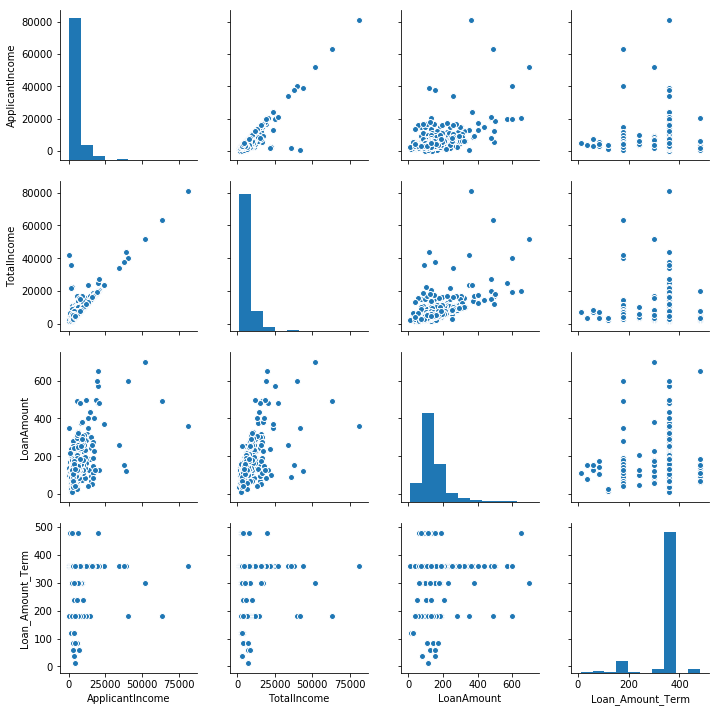

In [131]:
import seaborn as sns

loan_df = df[['ApplicantIncome','TotalIncome','LoanAmount','Loan_Amount_Term']]
sns.pairplot(loan_df);

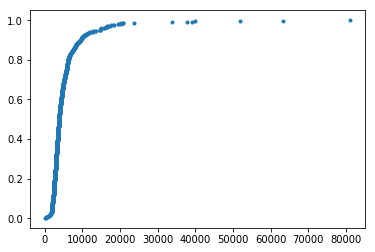

In [132]:
xs = np.sort(df['ApplicantIncome'])

ys = np.arange(1, len(xs) + 1)/len(xs)

plt.plot(xs, ys, marker='.',linestyle='none');

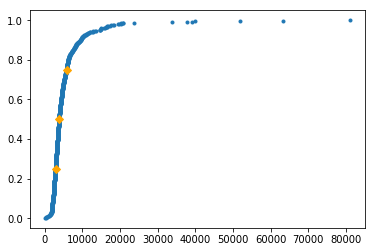

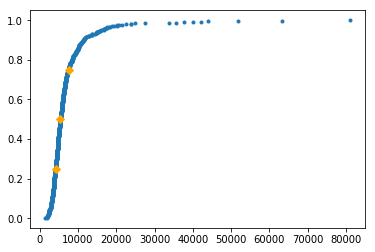

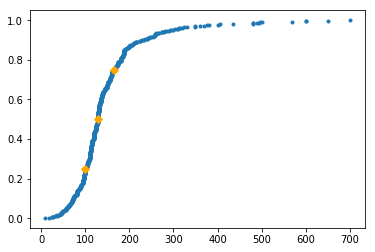

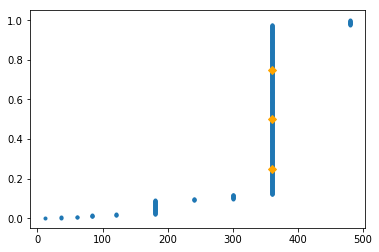

In [138]:
#percentiles = np.array([25,50,75])

# Calculate the percentiles
#ptiles = np.percentile(df_NH['Age'], percentiles)

# Overlay the percentiles with red diamonds. Rescaling the percentiles array - dividing by 100.
#plt.plot(ptiles, percentiles/100, marker='D', color='red', linestyle='none')

def darwin_ecdf(dfd):
    percentiles = np.array([25,50,75])
    percent_marks = np.percentile(df[dfd], percentiles)
    xs = np.sort(df[dfd])
    ys = np.arange(1, len(xs) + 1)/len(xs)
    plt.plot(xs, ys, marker='.',linestyle='none');
    plt.plot(percent_marks, percentiles/100, marker='D', color='orange', linestyle='none')
    plt.show()
    
#darwin_ecdf('ApplicantIncome')

loan_categories = ['ApplicantIncome','TotalIncome','LoanAmount','Loan_Amount_Term']

for category in loan_categories:
    darwin_ecdf(category)

**Step 5: ** Compute the chances of securing/getting a loan based on Credit History

Hint: Will require the use of the crosstab function

**Step 6:** Use Statistical Techniques to make quantitative statements on data

**1)** Detect relationships in the Loan dataset. 

For example: 

a) Does the 'Applicant Income' and the 'Loan Amount' vary together? Construct a scatter plot that plots the 'Applicant Income' v/s "Loan Amount"'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. 

b) Does the 'Total Income' and the 'Loan Amount' vary together? Construct a scatter plot that plots the 'Total Income' v/s "Loan Amount"'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

c) Are there any other variables that vary together? Construct a scatter plot that plots the respective variables. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.


**2)** Gauge the strength of the relationships

For example:

a) Compute the Correlation Coefficient between the 2 variable i.e. 'Applicant Income' and the 'Loan Amount'.

b) Compute the Correlation Coefficient between the 2 variable i.e. 'Total Income' and the 'Loan Amount'.
 
c) Compute the Correlation Coefficient between the pair of variables you have identied
  

**Step 7:** Use Statistical Techniques to make quantitative statements on data. We will use a) Spearman's Rank Correlation, b) Chi-Square tables

1) Detect relationships amongst categorical, non-linearly related and non-normally distributed variables in the Loan dataset

For example: 

  a) Construct a Scatter Plot of 'Loan Term' amd 'Credit History' to verify that the variables are related non-lineraly. Create a Histogram for "Loan Term" and 'Credit History' to ascertain that they are 
     not-normally distributed. A visual examination of the data proves that 'Loan Term' and 'Credit History' are numeric variables that can be placed in categories.

  b) Compute the Spearman's Rank Correlation Coefficient

  c) Conduct the Chi-Square test to ascertain how the 'Loan Term' variable is related to 'Credit History'

2) Use Spearman's Rank to find the correlation between **other ** categorical, non-linearly related and non-normally distributed variables.

*Hint*: There are categorical variables in the dataset that can be coded as numeric values i.e. 0,1

**Step 8**: Check for Normality - Check normality by overlaying the 'ECDF' over the 'CDF'.

Reference: https://www.andata.at/en/software-blog-reader/why-we-love-the-cdf-and-do-not-like-histograms-that-much.html

Does the distribution of 'Applicant Income' follow a normal distribution?

Hint: Code Snippet has been provided. Complete the rest of the code.



In [0]:
#Function to compute the ECDF
def ECDF(input):
 
    # Number of data points
    n = len(input)
    
    # x_data for the ECDF
    x_data = np.sort(input)

    # y_data for the ECDF
    y_data = np.arange(1, n+1) / n

    return x_data, y_data
  
  
#Checking the Normality of Data - we will compute the CDF by using np.random.samples to draw samples and then compare with ECDF
mean = np.mean(Fill in the code) 
std = np.std(Fill in the code)


#Draw Samples
samples = np.random.normal(mean, std, size=10000)


#Compute ECDF 

Fill in the code

#Compute CDF

Fill in the code


# Generate plot

Fill in the code

# Label the axes
plt.xlabel('Applicant Income')
plt.ylabel('CDF')
           
# Show the plot           
plt.show()

#State your conclusion


**Step 9:** Use Statistical Techniques to make quantitative statements on data. 

What are the chances that the bank fail? 

Let's assume for every 0 to 1000 mortgage loans the bank makes, a certain number of loans will be defaulted on. The probability of a loan default is p = 0.05 The bank will fail if there are greater than 100 defaults.

Hint: Use the techniques applied in Coding Challenge #4




**Step 10**: Publish findings - In this step, you are going to conduct statistical analysis on a dataset from the Data.gov website.

1) Pick a dataset (decent size dataset - approx. 10k to 15K records)

2) Walk through the statistical analysis journey highlighted within this Sprint Challenge

3) Summarize your findings at each step of the statistical analysis journey

4) Conclude your the journey with a brief section providing an overview of your findings

5) Publish your statistical analysis journey as a blog post

6) Include a link to your blog post in your submission



In [ ]:
!git status && git add . && git status

In [ ]:
!git commit -am ""

In [ ]:
!git status && date

In [ ]:
 git push && git status && date